<a href="https://colab.research.google.com/github/alibgil/Old_car_price_prediction/blob/main/Old_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Old car price prediction**

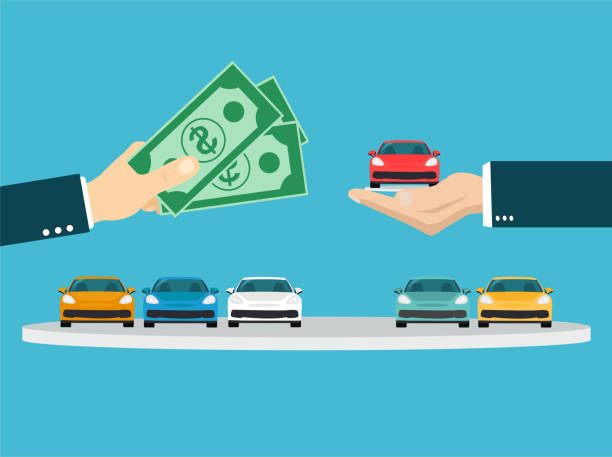

Este conjunto de datos contiene información sobre el nombre del automóvil antiguo, los kilómetros recorridos, el tipo de combustible, el tipo de transmisión, el año de fabricación, el CC del motor, el número de asientos, etc. y podemos usarlo para el problema de predicción del precio del automóvil antiguo con modelos de Regresión.

| Variable            |
|---------------------|
| car_name            |
| car_prices_in_rupee |
| kms_driven          |
| fuel_type           |
| transmission        |
| ownership           |
| manufacture         |
| engine              |
| Seats               |

##Fuentes de datos


[Kaggle](https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction)


[Data source](https://www.cardekho.com/used-car-details)

In [ ]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Base de datos
from google.colab import drive
drive.mount('/content/drive')

filename= '/content/drive/MyDrive/BootCamp/ML/car_price.csv'

df = pd.read_csv(filename)
df.head()

Mounted at /content/drive


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


### I.- Análisis Exploratorio

**Manipulación de datos**

In [ ]:
#Eliminar columna index
df = df.drop('Unnamed: 0', axis=1)
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [ ]:
#inspect the data
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB
None 

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64


No se visualizan valores nulos

In [ ]:
#Identificación categorías
cat_var = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ]
for cat in cat_var:
  print(df[cat].value_counts())

Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: car_name, Length: 1896, dtype: int64
4.50 Lakh     62
3.50 Lakh     62
3 Lakh        58
6.50 Lakh     57
5.50 Lakh     52
              ..
12.03 Lakh     1
15.62 Lakh     1
7.92 Lakh      1
29.25 Lakh     1
31.90 Lakh     1
Name: car_prices_in_rupee, Length: 1300, dtype: int64
80,000 kms      163
1,20,000 kms    146
60,000 kms      142
50,000 kms      136
70,000 kms      132
               ... 
79,385 kms        1
51,242 kms        1
38,733 kms        1
77,385 kms        1
85,002 kms        1
Name: kms_driven, Length: 2610, dtype: int64
Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: fuel_typ

Se evidencia que la base de datos contiene 10 columnas, la cual nos provee solo 3 características: fuel_type, transmission y Seats. Por lo tanto, para esta limpieza tenemos el reto asignar la tipología correspondiente a cada variable, pero lo mas retador es identificar si todas las variables nos aportan valor

In [ ]:
#transformar datos de crore a lakhs
filtro= df[df.car_prices_in_rupee.str.contains('Crore')]
filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee'].str.replace(' Crore', '').astype(float)
filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee']* 100
filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 119 to 5483
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             56 non-null     object 
 1   car_prices_in_rupee  56 non-null     float64
 2   kms_driven           56 non-null     object 
 3   fuel_type            56 non-null     object 
 4   transmission         56 non-null     object 
 5   ownership            56 non-null     object 
 6   manufacture          56 non-null     int64  
 7   engine               56 non-null     object 
 8   Seats                56 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.4+ KB


<ipython-input-6-3e91f4e2fb69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee'].str.replace(' Crore', '').astype(float)
<ipython-input-6-3e91f4e2fb69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee']* 100


In [ ]:
#Quitar Crore y limpiar car_prices
df.drop(df[df.car_prices_in_rupee.str.contains('Crore')].index, inplace=True)
df['car_prices_in_rupee']= df['car_prices_in_rupee'].str.replace(',', '.')
df['car_prices_in_rupee']= df['car_prices_in_rupee'].str.replace(' Lakh', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5456 non-null   object 
 1   car_prices_in_rupee  5456 non-null   float64
 2   kms_driven           5456 non-null   object 
 3   fuel_type            5456 non-null   object 
 4   transmission         5456 non-null   object 
 5   ownership            5456 non-null   object 
 6   manufacture          5456 non-null   int64  
 7   engine               5456 non-null   object 
 8   Seats                5456 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 426.2+ KB


In [ ]:
#Unir información
df= df.append(filtro)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5483
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   object 
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   object 
 8   Seats                5512 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 430.6+ KB


In [ ]:
#Limpiar variables

#kms_driven
df['kms_driven']= df['kms_driven'].str.replace(',', '')
df['kms_driven']= df['kms_driven'].str.replace(' kms', '').astype(int)

#Seats
df['Seats']= df['Seats'].str.replace(' Seats', '').astype(int)

#engine
df['engine']= df['engine'].str.replace(' cc', '').astype(int)

#manufacture
df['manufacture']= df['manufacture'].astype(str)

In [ ]:
#Homologación catagorías
df['ownership']= df['ownership'].replace({'0th Owner': '0', '1st Owner': '1', '2nd Owner': '2', '3rd Owner': '3', '4th Owner': '4', '5th Owner': '5'})

In [ ]:
#Cantidad de valores duplicados
df.duplicated().sum()

76

Se identifican 76 valores duplicados

In [ ]:
#Se identifican valores duplicados de la BD
df1 = df[df.duplicated(keep=False)]

df1 = df1.groupby(df1.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
df1= np.array(df1)
filtered_df=df.iloc[df1.flatten()]
filtered_df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1232,Land Rover Range Rover Velar R-Dynamic S Petro...,85.00,38000,Petrol,Automatic,1,2020,1197,5
1576,Maruti Swift Dzire VXI,3.67,84728,Petrol,Manual,2,2015,1968,5
3748,Nissan Magnite XL,5.47,25166,Petrol,Manual,1,2021,1396,5
4325,Jeep Compass 1.4 Longitude Plus AT,16.90,78000,Petrol,Automatic,1,2018,1197,5
2938,Audi A6 35 TDI,19.80,85000,Diesel,Automatic,1,2015,1086,5
...,...,...,...,...,...,...,...,...,...
1389,Hyundai i20 Asta 1.4 CRDi,3.50,38931,Diesel,Manual,1,2013,1396,5
1125,Maruti Baleno 1.2 Alpha,6.30,36438,Petrol,Manual,2,2018,2179,7
1398,BMW 3 Series Luxury Edition,44.50,9200,Diesel,Automatic,1,2020,2755,7
1566,Toyota Innova Crysta 2.8 GX AT BSIV,18.75,26000,Diesel,Automatic,1,2018,4461,7


In [ ]:
#Se procede con la eliminación de los valores repetidos
df= df.drop_duplicates()

In [ ]:
#inspect the data
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5483
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5436 non-null   object 
 1   car_prices_in_rupee  5436 non-null   float64
 2   kms_driven           5436 non-null   int64  
 3   fuel_type            5436 non-null   object 
 4   transmission         5436 non-null   object 
 5   ownership            5436 non-null   object 
 6   manufacture          5436 non-null   object 
 7   engine               5436 non-null   int64  
 8   Seats                5436 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 424.7+ KB
None 

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64


Se realiza la limpieza de los datos donde se evidencia cambio de tipología, homologación de categorías, identificación de valores faltantes y eliminación de datos duplicados.

**Visualizaciones**

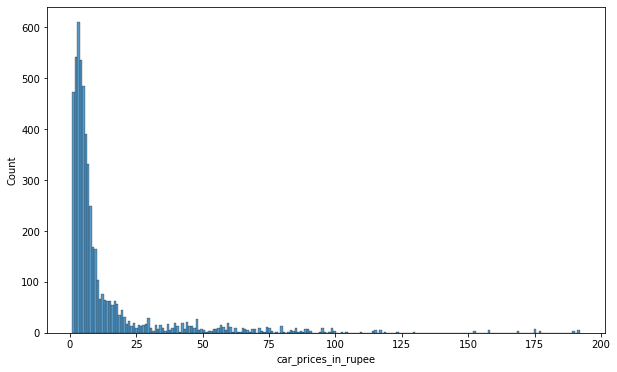

In [ ]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df.car_prices_in_rupee)
plt.show()

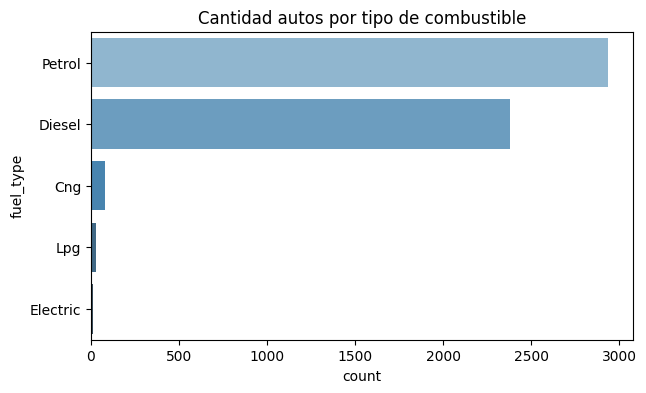

In [ ]:
# bar plot: fuel_type

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="fuel_type",
    data=df,
    order=df['fuel_type'].value_counts().index,
    palette="Blues_d",
    linewidth=3
)
plt.title('Cantidad autos por tipo de combustible')
plt.show()

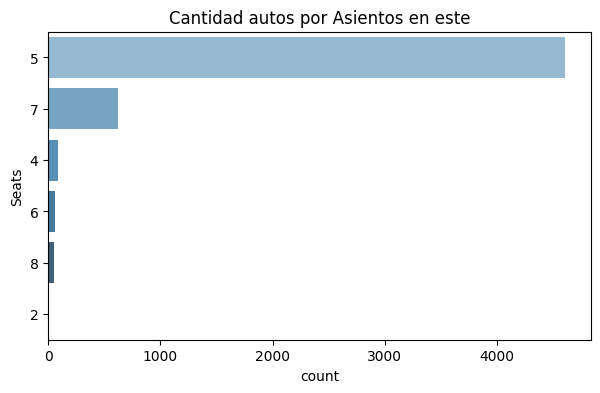

In [ ]:
# bar plot: fuel_type

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="Seats",
    data=df,
    order=df['Seats'].value_counts().index,
    palette="Blues_d",
    linewidth=3
)
plt.title('Cantidad autos por Asientos en este')
plt.show()

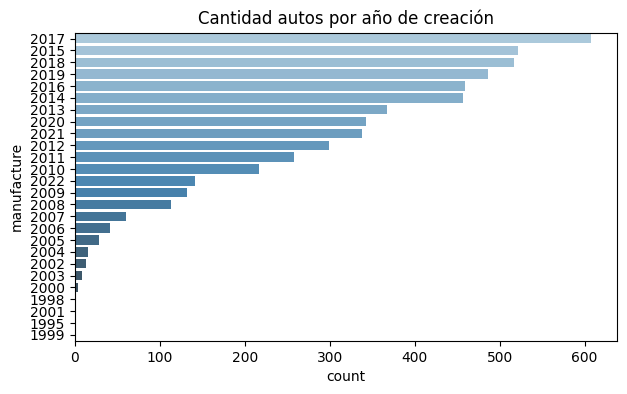

In [ ]:
# bar plot: fuel_type

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="manufacture",
    data=df,
    order=df['manufacture'].value_counts().index,
    palette="Blues_d",
    linewidth=3
)
plt.title('Cantidad autos por año de creación')
plt.show()

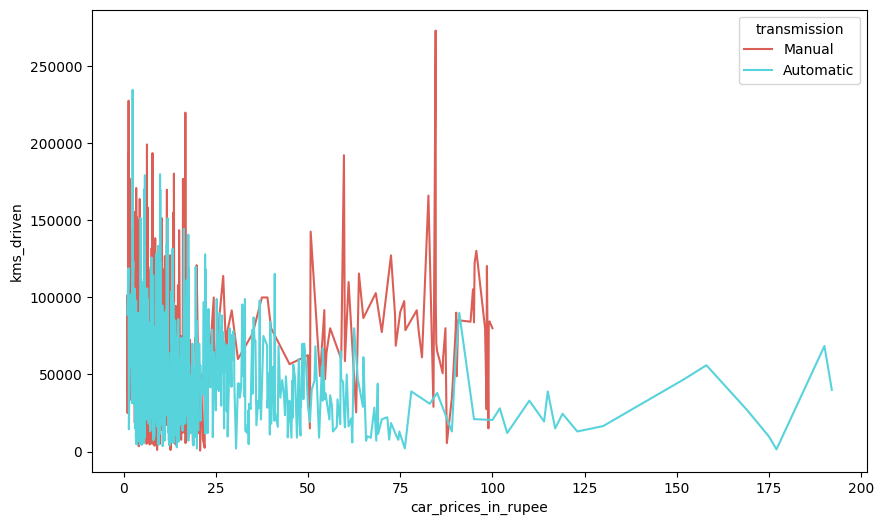

In [ ]:
# grafico de linea
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='car_prices_in_rupee',
    y='kms_driven',
    hue='transmission',# color por Transmisión
    data=df,
    ci = None,
    palette=palette
)   
plt.show()

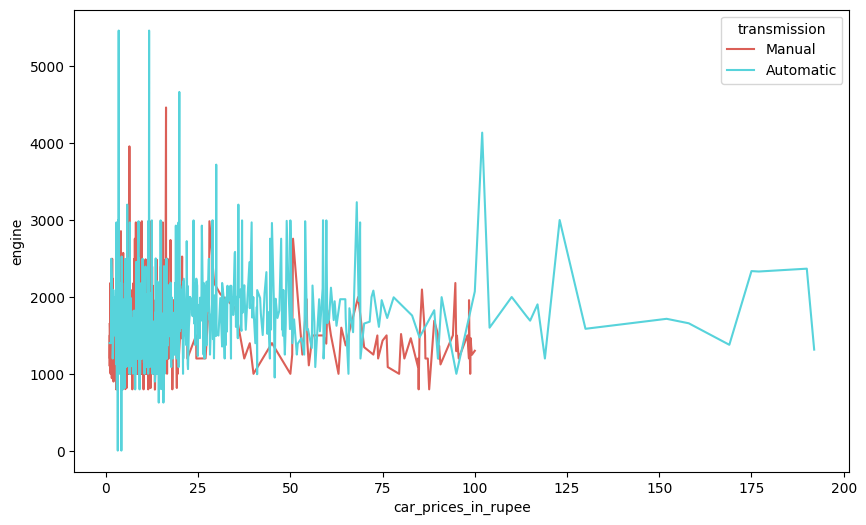

In [ ]:
# grafico de linea
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='car_prices_in_rupee',
    y='engine',
    hue='transmission',# color por Transmisión
    data=df,
    ci = None,
    palette=palette
)   
plt.show()

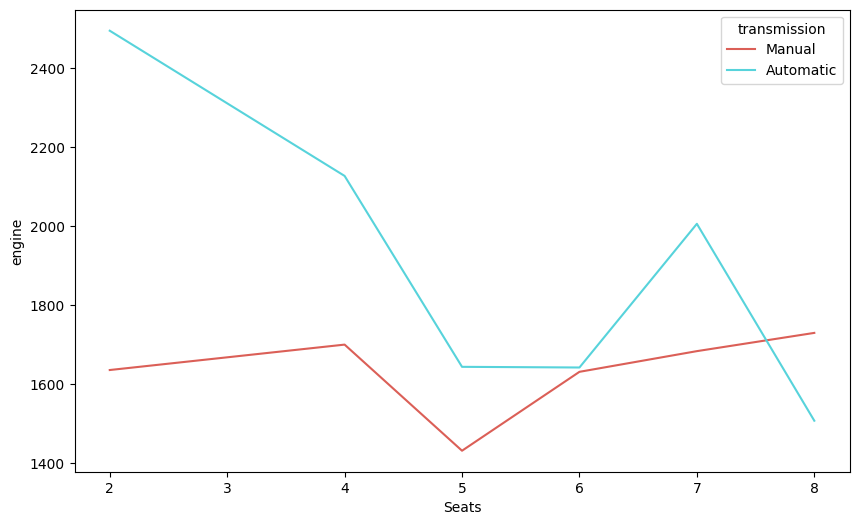

In [ ]:
# grafico de linea
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='Seats',
    y='engine',
    hue='transmission',# color por Transmisión
    data=df,
    ci = None,
    palette=palette
)   
plt.show()

In [ ]:
# formato wide
df.pivot_table(index="manufacture", 
                                     columns=["fuel_type", "transmission"],
                                     values="car_prices_in_rupee", 
                                     fill_value='', 
                                     aggfunc=pd.np.max)

<ipython-input-24-1cf16c050948>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  aggfunc=pd.np.max)


fuel_type       Cng    Diesel          Electric     Lpg    Petrol        
transmission Manual Automatic  Manual Automatic  Manual Automatic  Manual
manufacture                                                              
1995                              2.6                                    
1998                                                                 60.0
1999                                                                 35.0
2000                                                                 65.0
2001                             1.75                                80.0
2002                              1.8                         6.1    84.0
2003                             75.0                                99.0
2004                              4.9                        90.0    95.0
2005                             99.0                        2.25    98.9
2006                     6.85    70.0                         5.0    90.0
2007                      9.5    55.0            63.803      13.5  99.999
2008                     2.45    89.0            98.429      9.25  98.754
2009                    11.02     8.5              90.0       4.0  98.497
2010            1.8     23.75    8.79              70.0     15.25  90.316
2011           1.91      54.0  84.602              1.76      35.0  99.205
2012           2.45      22.9    95.0               2.5     29.75    85.0
2013           3.15     39.75  95.633              2.81      68.9     6.5
2014           4.86     47.75    17.5      3.21     2.8      12.9  86.503
2015           6.75      91.0   14.14      23.0              64.9  98.414
2016           7.25      66.0    15.0               2.6      33.8    10.5
2017           6.52      83.0   28.05                       152.0    9.95
2018           7.05     158.0    22.0               2.2      65.0    14.0
2019            6.1     190.0    37.5      6.31             192.0   15.65
2020           9.06     130.0   29.32      21.1             175.0   16.95
2021            7.5     130.0   20.65     21.85             175.0   18.07
2022            7.5     177.0   22.06      15.5              74.5   20.75

En la vista anterior podemos ver el precio del carro según año de construcción, tipo de combustible y transmisión.

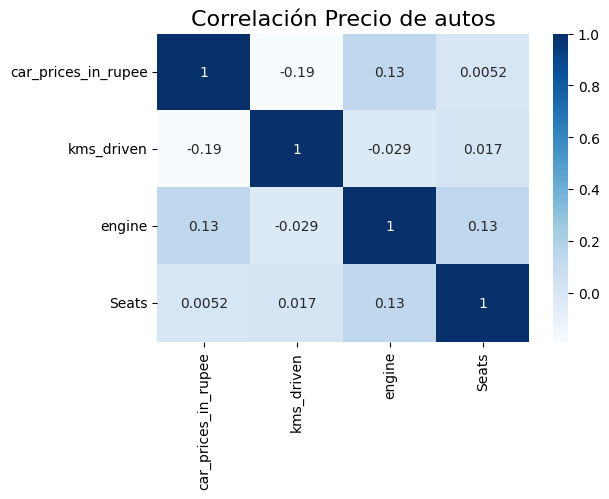

In [ ]:
# Se realiza mapa de calor con las correlaciones de las variables
corr = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.title('Correlación Precio de autos', fontsize = 16)
plt.show()

**Preprocesamiento**

Realizaremos una transformación de las variables categoricas y escalamiento de las númericas para tener una validación de variables mas acertada